# BindsNET Neuron (Node) Models

## 1. Table of Contents
1. Table of Contents
2. Overview
3. Import Statements
4. Neuron Models
    1. Integrate-and-Fire (IF)
    2. Leaky Integrate-and-Fire (LIF)
    3. Spike Response Model 0 (SRM0)
5. Spike Traces

## 2. Overview
Detailed documentation of the node creation process has been specified [here](https://bindsnet-docs.readthedocs.io/guide/guide_part_i.html#creating-a-network). This document will go into more specific examples of configuring a spiking neural network in BindsNET.

## 3. Import Statements

In [14]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from bindsnet.encoding import *
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes, IFNodes, SRM0Nodes, AdaptiveLIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.network.monitors import NetworkMonitor

from bindsnet.analysis.plotting import plot_spikes, plot_voltages, plot_input, plot_weights

## 4. Neuron Models

### 4a. Integrate-and-Fire (IF) Model

Incoming spikes are integrated (added) to the membrane potential.

This model was adapted from http://neuronaldynamics.epfl.ch/online/Ch1.S3.html

### Parameters
Below is a table that describes the parameters that can be tweaked to customize the IF Neuron model.

| Parameter       | Type                      | Description                                   | Default Value |
|-----------------|---------------------------|-----------------------------------------------|---------------|
| n               | Optional\[int]             | The number of neurons in the layer.           | None          |
| shape           | Optional\[Iterable\[int]]   | The dimensionality of the layer.              | None          |
| traces          | bool                      | Whether to record spike traces.               | False         |
| traces_additive | bool                      | Whether to record spike traces additively.    | False         |
| tc_trace        | Union\[float torch.Tensor] | Time constant of spike trace decay.           | 20.0          |
| trace_scale     | Union\[float torch.Tensor] | Scaling factor for spike trace.               | 1.0           |
| sum_input       | bool                      | Whether to sum all inputs.                    | False         |
| thresh          | Union\[float torch.Tensor] | Spike threshold voltage.                      | -52.0         |
| reset           | Union\[float torch.Tensor] | Post-spike reset voltage.                     | -65.0         |
| refrac          | Union\[int torch.Tensor]   | Refractory (non-firing) period of the neuron. | 5             |
| lbound          | float                     | Lower bound of the voltage.                   | None          |

---------------------

### 4b. Leaky Integrate-and-Fire (LIF) Model

Incoming spikes are integrated (added) to the membrane potential. The membrane potential decrements at each timestep.

This model was adapted from http://icwww.epfl.ch/~gerstner/SPNM/node26.html#SECTION02311000000000000000

### Parameters
Below is a table that describes the parameters that can be tweaked to customize the LIF Neuron model.

| Parameter       | Type                       | Description                                   | Default Value |
|-----------------|----------------------------|-----------------------------------------------|---------------|
| n               | Optional\[int]              | The number of neurons in the layer.           | None          |
| shape           | Optional\[Iterable\[int]]    | The dimensionality of the layer.              | None          |
| traces          | bool                       | Whether to record spike traces.               | False         |
| traces_additive | bool                       | Whether to record spike traces additively.    | False         |
| tc_trace        | Union\[float, torch.Tensor] | Time constant of spike trace decay.           | 20.0          |
| trace_scale     | Union\[float, torch.Tensor] | Scaling factor for spike trace.               | 1.0           |
| sum_input       | bool                       | Whether to sum all inputs.                    | False         |
| thresh          | Union\[float, torch.Tensor] | Spike threshold voltage.                      | -52.0         |
| rest            | Union\[float, torch.Tensor] | Resting membrane voltage.                     | -65.0         |
| reset           | Union\[float, torch.Tensor] | Post-spike reset voltage.                     | -65.0         |
| refrac          | Union\[int, torch.Tensor]   | Refractory (non-firing) period of the neuron. | 5             |
| tc_decay        | Union\[float, torch.Tensor] | Time constant of neuron voltage decay.        | 100.0         |
| lbound          | float                      | Lower bound of the voltage.                   | None          |

---------------------

### 4c. Adaptive Leaky Integrate-and-Fire (LIF) Model

Incoming spikes are integrated (added) to the membrane potential. The membrane potential decrements at each timestep. The voltage threshold is increased by some constant each time it spikes. Otherwise, it decays back to its default value.

### Parameters
Below is a table that describes the parameters that can be tweaked to customize the LIF Neuron model.

| Parameters      | Type            | Description                                   | Default Value |
|-----------------|-----------------|-----------------------------------------------|---------------|
| n               | n               | The number of neurons in the layer.           | None          |
| shape           | shape           | The dimensionality of the layer.              | None          |
| traces          | traces          | Whether to record spike traces.               | False         |
| traces_additive | traces_additive | Whether to record spike traces additively.    | False         |
| tc_trace        | tc_trace        | Time constant of spike trace decay.           | 20.0          |
| trace_scale     | trace_scale     | Scaling factor for spike trace.               | 1.0           |
| sum_input       | sum_input       | Whether to sum all inputs.                    | False         |
| rest            | rest            | Resting membrane voltage.                     | -65.0         |
| reset           | reset           | Post-spike reset voltage.                     | -65.0         |
| thresh          | thresh          | Spike threshold voltage.                      | -52.0         |
| refrac          | refrac          | Refractory (non-firing) period of the neuron. | 5             |
| tc_decay        | tc_decay        | Time constant of neuron voltage decay.        | 100.0         |
| theta_plus      | theta_plus      | Voltage increase of threshold after spiking.  | 0.05          |
| tc_theta_decay  | tc_theta_decay  | Time constant of adaptive threshold decay.    | 1e7           |
| lbound          | lbound          | Lower bound of the voltage.                   | None          |

---------------------

### 4d. Spike Response Model 0 (SRM0)

Incoming spikes are integrated (added) to the membrane potential. The membrane potential decrements at each timestep.

This model was adapted from https://intranet.physio.unibe.ch/Publikationen/Dokumente/Vasilaki2009PloSComputBio_1.pdf

### Parameters
Below is a table that describes the parameters that can be tweaked to customize the SRM0 Neuron model.

| Parameter       | Type                       | Description                                          | Default Value |
|-----------------|----------------------------|------------------------------------------------------|---------------|
| n               | Optional\[int]              | The number of neurons in the layer.                  | None          |
| shape           | Optional\[Iterable[int]]    | The dimensionality of the layer.                     | None          |
| traces          | bool                       | Whether to record spike traces.                      | False         |
| traces_additive | bool                       | Whether to record spike traces additively.           | False         |
| tc_trace        | Union\[float, torch.Tensor] | Time constant of spike trace decay.                  | 20.0          |
| trace_scale     | Union\[float, torch.Tensor] | Scaling factor for spike trace.                      | 1.0           |
| sum_input       | bool                       | Whether to sum all inputs.                           | False         |
| thresh          | Union\[float, torch.Tensor] | Spike threshold voltage.                             | -50.0         |
| rest            | Union\[float, torch.Tensor] | Resting membrane voltage.                            | -70.0         |
| reset           | Union\[float, torch.Tensor] | Post-spike reset voltage.                            | -70.0         |
| refrac          | Union\[int, torch.Tensor]   | Refractory (non-firing) period of the neuron.        | 5             |
| tc_decay        | Union\[float, torch.Tensor] | Time constant of neuron voltage decay.               | 10.0          |
| lbound          | float                      | Lower bound of the voltage.                          | None          |
| eps_0           | Union\[float, torch.Tensor] | Scaling factor for pre-synaptic spike contributions. | 1.0           |
| rho_0           | Union\[float, torch.Tensor] | Stochastic intensity at threshold.                   | 1.0           |
| d_thresh        | Union\[float, torch.Tensor] | Width of the threshold region.                       | 5.0           |

<!--
Tables generated using https://www.tablesgenerator.com/markdown_tables#
-->

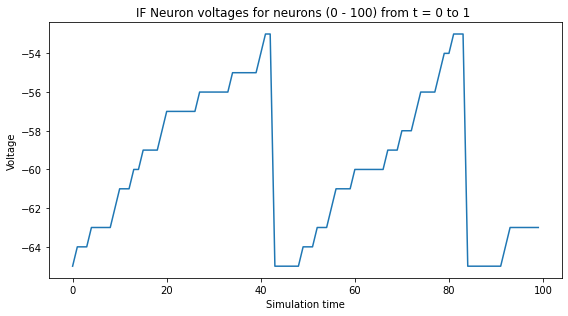

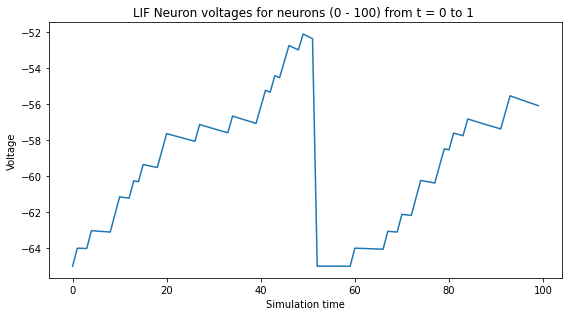

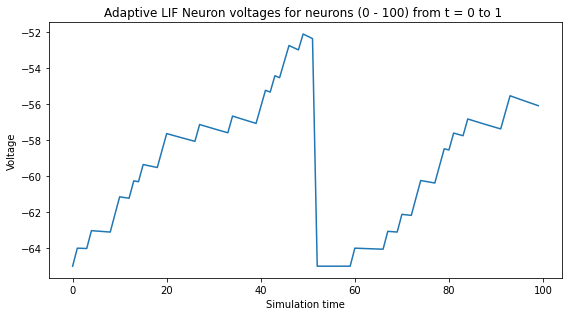

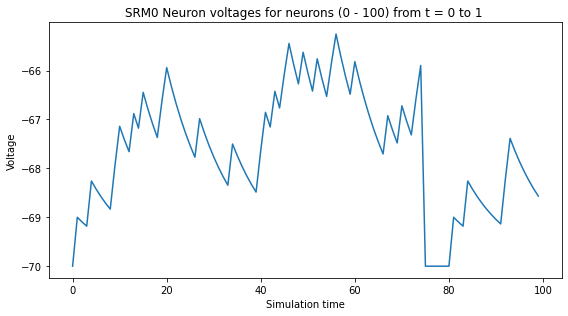

In [18]:
# initialize network
network = Network()
network = Network()

# set number of neurons
num_inputs = 1
num_neurons = 1

# simulation time
time = 100
dt = 1

# configure weights for the synapses between the input layer and LIF layer
w = torch.round(torch.abs(2 * torch.randn(num_inputs, num_neurons)))

# create input spike data, where each spike is distributed according to Bernoulli(0.1)
input_data = torch.bernoulli(0.3 * torch.ones(time, num_inputs)).byte()
inputs = {"Input Layer": input_data}

# initialize list of neuron models
neuron_models = [IFNodes(n=num_neurons),LIFNodes(n=num_neurons),AdaptiveLIFNodes(n=num_neurons),SRM0Nodes(n=num_neurons)]
neuron_types = ["IF Neuron","LIF Neuron","Adaptive LIF Neuron","SRM0 Neuron"]
spikes={}
voltages={}

s_ims = None
s_axes = None
v_ims = None
v_axes = []

for neuron_model_index in range(len(neuron_models)):
    # initialize input and neuron layers
    input_layer = Input(n=num_inputs)
    neuron_layer = neuron_models[neuron_model_index]

    # connection between the input layer and the LIF layer
    connection = Connection(
        source=input_layer, target=neuron_layer,w=w
    )

    # create a monitor
    neuron_layer_monitor = Monitor(
        obj=neuron_layer,
        state_vars=("s", "v"),  # Record spikes and voltages.
        time=time,  # Length of simulation (if known ahead of time).
    )

    # add layers to network
    network.add_layer(
        layer=input_layer, name="Input Layer"
    )
    network.add_layer(
        layer=neuron_layer, name="Neuron Layer"
    )


    # add connection to network
    network.add_connection(
        connection=connection, source="Input Layer", target="Neuron Layer"
    )

    # add monitor to the network
    network.add_monitor(monitor=neuron_layer_monitor, name="Neuron Layer")

    # simulate network on input data
    network.run(inputs=inputs, time=time)

    # retrieve and plot simulation spike, voltage data from monitors
    # s_ims, s_axes = plot_spikes({neuron_types[neuron_model_index] : neuron_layer_monitor.get("s")},ims=s_ims,axes=s_axes)
    v_axes = plot_voltages({neuron_types[neuron_model_index] : neuron_layer_monitor.get("v")}, plot_type="line",axes=v_axes)


# plot spikes and voltages of the LIF layer
# TODO: plot axes
# plot_spikes(spikes)
# plot_voltages(voltages, plot_type="line")

plt.show()

## 5. Spike Traces

### Overview

![Neuron Spike Trace](http://www.scholarpedia.org/w/images/3/3e/STDP-Fig2.png)

Top: A presynaptic spike leaves a trace $x_j(t)$ which is read out (arrow) at the moment of the postsynaptic spike. The weight change is proportional to that value $x_j(t_n)$ 

Bottom: A postsynaptic spike leaves a trace $y(t)$ which is read out (arrow) at the moment of a presynaptic spike.

Source: http://www.scholarpedia.org/article/Spike-timing_dependent_plasticity

### BindsNET Traces

In BindsNET, each node layer has the following variables to keep track of the node traces:

| Neuron Layer Variable | Description | Shape | 
| - | - | - | 
| `Nodes.s` | spike occurances at the current time step | `batch_size` x `n` |
| `Nodes.x` | firing traces; set to 1 wherever `Node.s` is 1, otherwise multiplied by `Nodes.trace_decay` | `batch_size` x `n` |
| `Nodes.tc_trace` | time constant for trace decay | 1 |
| `Nodes.trace_decay` | spike trace decay per time step: $e^{{-dt}/\tau}$ | 1 |
| `Nodes.traces_additive` | spike traces are added to the previous value and not maxed out at 1 | 1 |

At each time step `dt`:

1. Node membrane potentials `Nodes.v` are updated based on the input `x`

2. Node spikes are recorded in `Nodes.s`
 
3. Node traces `Nodes.x` are multiplied by the `Nodes.trace_decay`

4. Node traces `Nodes.x` are set to 1 wherever spikes have occured (or 1's are added if `Nodes.traces_additive` is set to `True`)